In [ ]:
!pip install gdown

Ссылка на архив с изображениями https://drive.google.com/file/d/1Vce-EKd9LgNwm2T8jNfg-fR6zBBwYe7Z/view?usp=sharing

In [ ]:
import gdown

!gdown --id 1Vce-EKd9LgNwm2T8jNfg-fR6zBBwYe7Z

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Vce-EKd9LgNwm2T8jNfg-fR6zBBwYe7Z
From (redirected): https://drive.google.com/uc?id=1Vce-EKd9LgNwm2T8jNfg-fR6zBBwYe7Z&confirm=t&uuid=7f1135ba-400c-4fef-9eb3-197f7ae4f6dc
To: /content/images.zip
100% 966M/966M [00:15<00:00, 63.0MB/s]


In [ ]:
# Распаковка архива

import zipfile
import os

# Укажите путь к вашему zip-файлу
zip_file_path = '/content/images.zip'
# Укажите директорию, в которую нужно разархивировать
extract_to = '/content'

# Создаем директорию, если она не существует
os.makedirs(extract_to, exist_ok=True)

# Разархивируем файл
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Файлы успешно разархивированы!")


Файлы успешно разархивированы!


In [ ]:
# Подключение утилит для to_categorical
from tensorflow.keras import utils

# Подключение библиотеки для работы с массивами
import numpy as np

# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt

# Подключение библиотеки для генерации случайных чисел
import random

# Подключение класса для работы с изображением
from PIL import Image

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

# Подключение нужных слоев из модуля tensorflow.keras.layers

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

# Подключение оптимизатора Adam
from tensorflow.keras.optimizers import Adam

# для разделения выборок
from sklearn.model_selection import train_test_split

# модуль для отсчета времени
import time

In [ ]:
# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/images/'

In [ ]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 10, метки классов: ['crease', 'crescent_gap', 'inclusion', 'oil_spot', 'punching_hole', 'rolled_pit', 'silk_spot', 'waist_folding', 'water_spot', 'welding_line']


In [ ]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 10, метки классов: ['crease', 'crescent_gap', 'inclusion', 'oil_spot', 'punching_hole', 'rolled_pit', 'silk_spot', 'waist_folding', 'water_spot', 'welding_line']


In [ ]:
# Получения списка файлов для каждого класса

for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

crease : ['img_06_430103100_01149.jpg', 'img_06_427199900_01134.jpg', 'img_01_4402117100_00006.jpg', 'img_01_4402270500_00004.jpg', 'img_01_429539000_00002.jpg', 'img_03_4405964900_00010.jpg', 'img_07_430103100_01150.jpg', 'img_02_4406430100_00002.jpg', 'img_03_4406783500_00009.jpg', 'img_06_3436814000_00687.jpg', 'img_05_4402826400_01261.jpg', 'img_03_SIS001559_00006.jpg', 'img_07_4405376700_00815.jpg', 'img_04_4401672100_00003.jpg', 'img_05_4403831800_00930.jpg', 'img_01_4402270500_00003.jpg', 'img_07_4405381400_00779.jpg', 'img_01_425501700_00022.jpg', 'img_07_4405965200_00151.jpg', 'img_06_4406783500_00003.jpg', 'img_04_4403690400_00005.jpg', 'img_04_4402117000_00004.jpg', 'img_01_425382900_00002.jpg', 'img_06_3436642500_00002.jpg', 'img_02_3436789500_00005.jpg', 'img_02_4406783500_00009.jpg', 'img_01_3436789500_00004.jpg', 'img_05_4405228100_00452.jpg', 'img_07_4405381400_00773.jpg', 'img_02_4406783500_00004.jpg', 'img_07_4406444100_00004.jpg', 'img_05_4405381400_00774.jpg', 'img_

Отобразим визуально для примера по одному изображению из каждого класса (при помощи функции .imshow() из модуля matplotlib.pyplot):

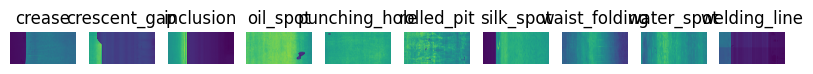

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(10, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):

    # Формирование пути к папке содержимого класса
    car_path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'

    # Выбор случайного фото из i-го класса
    img_path = car_path + random.choice(os.listdir(car_path))

    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [ ]:
crease_len = len(os.listdir('/content/images/crease'))
crescent_gap_len = len(os.listdir('/content/images/crescent_gap'))
inclusion_len = len(os.listdir('/content/images/inclusion'))
oil_spot_len = len(os.listdir('/content/images/oil_spot'))
punching_hole_len = len(os.listdir('/content/images/punching_hole'))
rolled_pit_len = len(os.listdir('/content/images/rolled_pit'))
silk_spot_len = len(os.listdir('/content/images/silk_spot'))
waist_folding_len = len(os.listdir('/content/images/waist_folding'))
water_spot_len = len(os.listdir('/content/images/water_spot'))
welding_line_len = len(os.listdir('/content/images/welding_line'))

print(f'crease: {crease_len}')
print(f'crescent_gap: {crescent_gap_len}')
print(f'inclusion_gap: {inclusion_len}')
print(f'oil_spot: {oil_spot_len}')
print(f'punching_hole: {punching_hole_len}')
print(f'rolled_pit: {rolled_pit_len}')
print(f'silk_spot: {silk_spot_len}')
print(f'waist_folding: {waist_folding_len}')
print(f'water_spot: {water_spot_len}')
print(f'welding_line: {welding_line_len}')

crease: 52
crescent_gap: 226
inclusion_gap: 216
oil_spot: 204
punching_hole: 219
rolled_pit: 31
silk_spot: 650
waist_folding: 146
water_spot: 289
welding_line: 273


In [ ]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} фото')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print()
print('Общий размер базы для обучения:', len(data_labels))

Размер класса crease составляет 52 фото
Размер класса crescent_gap составляет 226 фото
Размер класса inclusion составляет 216 фото
Размер класса oil_spot составляет 204 фото
Размер класса punching_hole составляет 219 фото
Размер класса rolled_pit составляет 31 фото
Размер класса silk_spot составляет 650 фото
Размер класса waist_folding составляет 146 фото
Размер класса water_spot составляет 289 фото
Размер класса welding_line составляет 273 фото

Общий размер базы для обучения: 2306


In [ ]:
# Размер изображений для уменьшения нагрузки
IMG_WIDTH = 256
IMG_HEIGHT = 125

# Загрузка и изменение размера изображений в RGB
X_data = []
for file in data_files:
    img = Image.open(file).convert('RGB').resize((IMG_WIDTH, IMG_HEIGHT))
    X_data.append(np.array(img))
X_data = np.array(X_data)




In [ ]:
# Нормализация изображений
X_data = X_data / 255.0

# Преобразуем метки в one-hot векторы
y_data = utils.to_categorical(data_labels, num_classes=CLASS_COUNT)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [ ]:
# Построение модели CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(CLASS_COUNT, activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 123, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 61, 127, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 61, 127, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 59, 125, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 49920)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,389,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,485,322 (24.74 MB)

 Trainable params: 6,484,874 (24.74 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
start = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
print("Время обучения:", time.time() - start)



Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.2303 - loss: 14.2413 - val_accuracy: 0.1003 - val_loss: 2.3711
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.3584 - loss: 10.5281 - val_accuracy: 0.0732 - val_loss: 2.2967
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.3749 - loss: 5.9650 - val_accuracy: 0.1084 - val_loss: 2.2746
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.3914 - loss: 3.5386 - val_accuracy: 0.2927 - val_loss: 2.2728
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.3967 - loss: 3.3411 - val_accuracy: 0.2927 - val_loss: 2.2628
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy: 0.4078 - loss: 2.9164 - val_accuracy: 0.3117 - val_loss: 2.5514
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.4482 - loss: 2.4735 - val_accuracy: 0.2520 - val_loss: 2.4107
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.4255 - loss: 2.2971 - val_accuracy: 

In [ ]:
# Оценка точности на тестовой выборке
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Точность на тестовой выборке: {test_accuracy:.4f}')



15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 634ms/step - accuracy: 0.5176 - loss: 2.7284
Точность на тестовой выборке: 0.5152


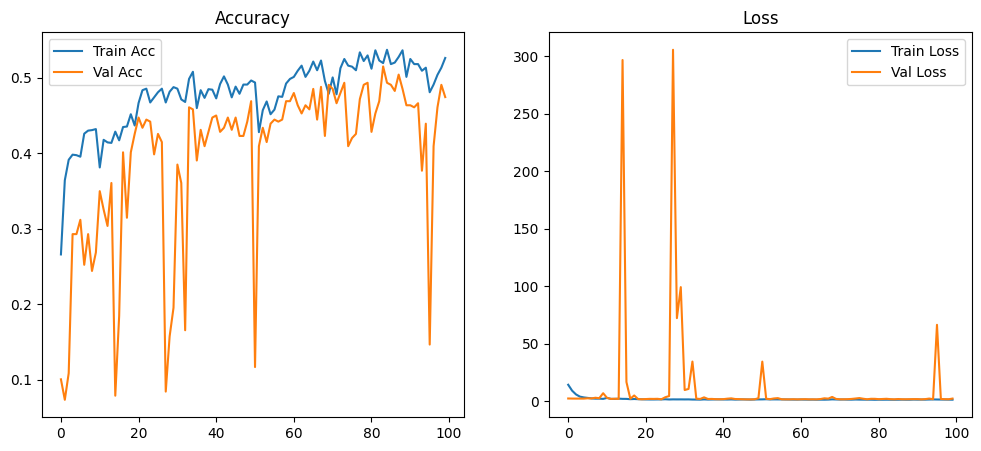

In [ ]:
# Построение графиков обучения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()